In [2]:
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [5]:
dataset_path = '/home/amanda/Dropbox/trabalho/testes/aplicacoes/ailerons/delta_ailerons.csv'
raw_dataset = pd.read_csv(dataset_path, names=['RollRate', 'PitchRate', 'currPitch', 'currRoll', 'diffRollRate', 'Sa'], delimiter=' ')
dataset = raw_dataset.copy()
dataset.tail()

,RollRate,PitchRate,currPitch,currRoll,diffRollRate,Sa
7124,-0.0043,0.0002,0.017,0.005,-0.00006,0.0002
7125,0.0046,0.0007,0.007,0.002,0.00015,-0.0002
7126,0.0040,0.0018,0.010,0.016,-0.00007,-0.0002
7127,-0.0082,0.0016,0.017,0.004,-0.00017,0.0004
7128,-0.0061,-0.0005,0.014,-0.013,0.00019,0.0001


In [6]:
len(dataset)

7129

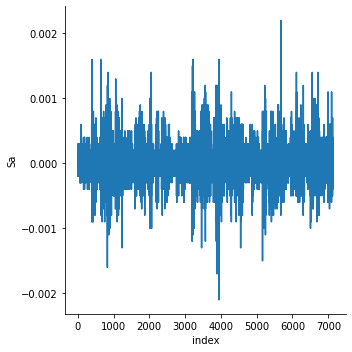

In [7]:
sns.relplot(x='index', y='Sa', kind='line', data=dataset.reset_index())

In [8]:
train_dataset = dataset.sample(n=3000,random_state=10)
test_dataset = dataset.drop(train_dataset.index)

In [9]:
print(len(train_dataset), len(test_dataset))

3000 4129


In [10]:
train_dataset.head()

,RollRate,PitchRate,currPitch,currRoll,diffRollRate,Sa
1965,0.0067,0.0014,0.010,-0.005,0.00018,-0.0004
3892,-0.0092,-0.0003,0.016,0.039,-0.00043,0.0002
2093,-0.0051,-0.0027,0.013,-0.013,0.00017,0.0001
5245,0.0084,0.0005,0.011,-0.005,0.00044,-0.0011
2470,0.0044,0.0021,0.006,-0.010,0.00006,0.0001


In [11]:
train_stats = train_dataset.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
RollRate,3000.0,0.000647,0.006201,-0.0162,-0.00490,0.00275,0.00560,0.01740
PitchRate,3000.0,0.001020,0.001856,-0.0077,-0.00020,0.00090,0.00210,0.00970
currPitch,3000.0,0.010751,0.005313,-0.0050,0.00700,0.01000,0.01400,0.04100
currRoll,3000.0,0.002471,0.015595,-0.0470,-0.00900,0.00350,0.01200,0.04700
diffRollRate,3000.0,-0.000010,0.000210,-0.0010,-0.00014,-0.00001,0.00012,0.00077
Sa,3000.0,-0.000016,0.000300,-0.0021,-0.00020,-0.00010,0.00020,0.00160


In [12]:
def scale(x):
  return (x - train_stats['min']) / (train_stats['max'] - train_stats['min'])
scaled_train_data = scale(train_dataset)
scaled_test_data = scale(test_dataset)

In [14]:
scaled_train_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
RollRate,3000.0,0.501402,0.184557,0.0,0.336310,0.563988,0.648810,1.0
PitchRate,3000.0,0.501142,0.106662,0.0,0.431034,0.494253,0.563218,1.0
currPitch,3000.0,0.342413,0.115501,0.0,0.260870,0.326087,0.413043,1.0
currRoll,3000.0,0.526287,0.165899,0.0,0.404255,0.537234,0.627660,1.0
diffRollRate,3000.0,0.559181,0.118905,0.0,0.485876,0.559322,0.632768,1.0
Sa,3000.0,0.563306,0.081077,0.0,0.513514,0.540541,0.621622,1.0


In [15]:
scaled_test_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
RollRate,4129.0,0.492241,0.182932,-0.136905,0.330357,0.532738,0.642857,1.008929
PitchRate,4129.0,0.501332,0.108187,0.011494,0.436782,0.494253,0.568966,1.063218
currPitch,4129.0,0.342545,0.118876,-0.021739,0.260870,0.326087,0.413043,0.913043
currRoll,4129.0,0.529289,0.170767,-0.031915,0.393617,0.542553,0.638298,1.042553
diffRollRate,4129.0,0.552585,0.121852,-0.282486,0.480226,0.553672,0.632768,1.028249
Sa,4129.0,0.567365,0.082377,0.216216,0.513514,0.540541,0.621622,1.162162


In [16]:
train_labels = scaled_train_data.pop('Sa')
test_labels = scaled_test_data.pop('Sa')

In [18]:
import os

def save(path):
    if not os.path.exists(path):
        os.makedirs(path)

    np.savetxt(path + 'X_train.csv', scaled_train_data)
    np.savetxt(path + 'X_test.csv', scaled_test_data)
    np.savetxt(path + 'Y_train.csv', train_labels)
    np.savetxt(path + 'Y_test.csv', test_labels)     

path = '/home/amanda/Dropbox/trabalho/testes/aplicacoes/ailerons/data/'
save(path)

path = '/home/amanda/Dropbox/trabalho/codigos/propostas/EVeP/data/ailerons/'
save(path)